/home/jovyan/earth-analytics/data/migrationstudy
Ecoregions shapefile saved successfully!
Found shapefiles:


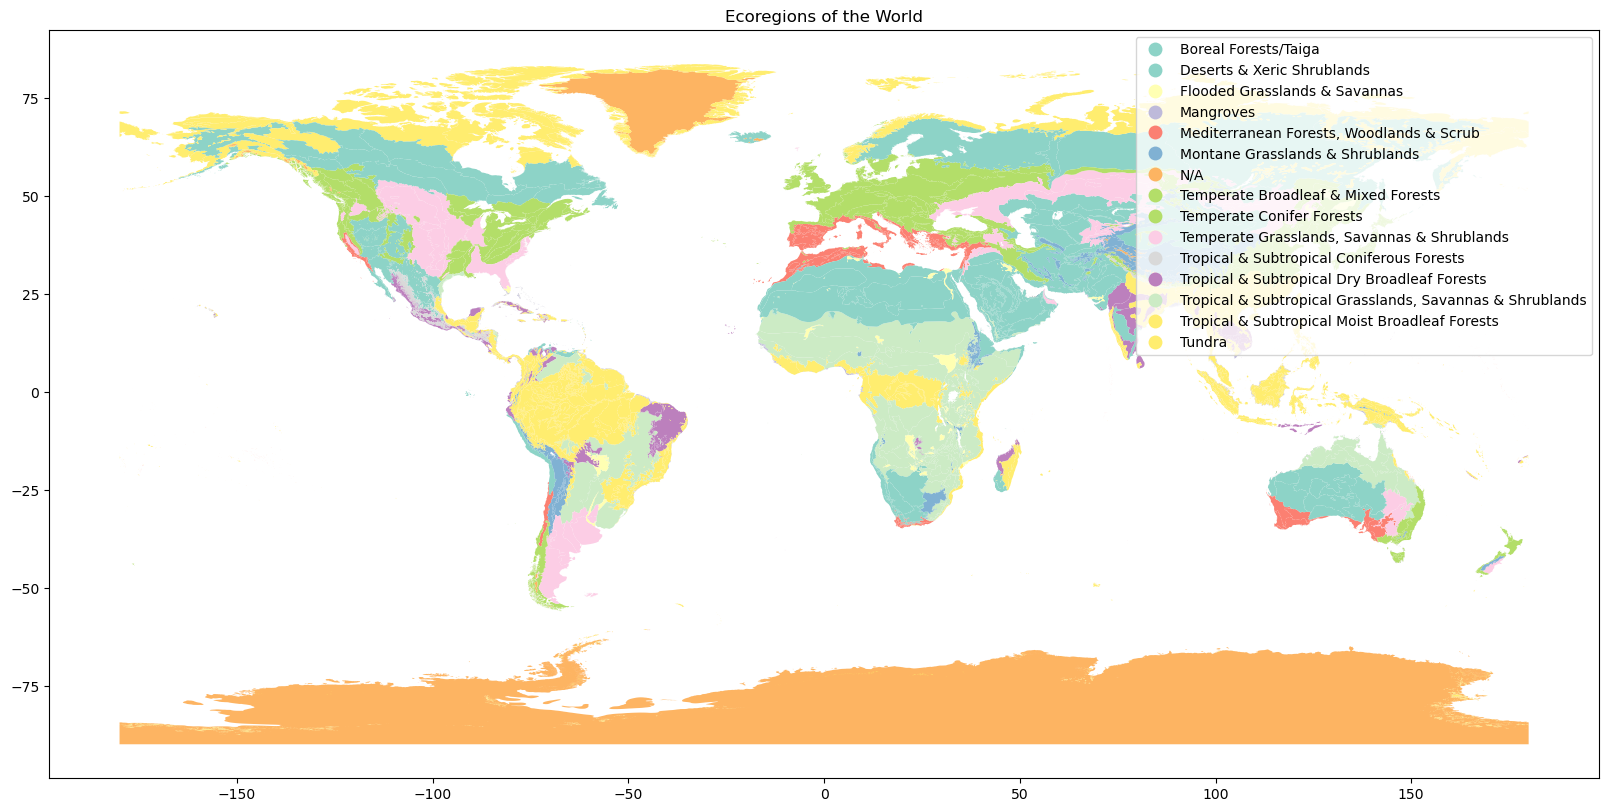

https://github.com/cu-esiil-edu/esiil-learning-portal/releases/download/data-release/species-distribution-foundations-data.zip
Index(['decimalLatitude', 'decimalLongitude', 'month'], dtype='object')
<bound method NDFrame.head of             decimalLatitude  decimalLongitude  month
gbifID                                              
4725400674        40.771550        -73.972480      9
4742743075        42.588123        -85.446250      5
4837921585        43.703064        -72.307290      5
4706255418        48.174270        -77.731260      7
4755072666        42.544277        -72.448360      5
...                     ...               ...    ...
4841667942        45.095398        -78.759460      5
4768698387        48.992554        -88.023315      7
4414313551        43.463517        -72.796772      5
4130116616        46.044158        -81.324347      6
4936523155        40.616838        -73.824810      5

[162775 rows x 3 columns]>
<bound method NDFrame.head of             month       

In [12]:
# copy from species-working-v1 here

# bring in libraries
# some spec by CGPT
# zipfile is downloads on windows 
# 
# This code checks and prints out the ecoregions of the world 

import os
import pathlib
import requests
import zipfile
import pandas as pd
import geopandas as gpd
import glob
import matplotlib.pyplot as plt

# Create data directory in the home folder
data_dir = os.path.join(
    # Home directory
    pathlib.Path.home(),
    # Earth analytics data directory
    'earth-analytics',
    'data',
    # Project directory
    'migrationstudy',
)
os.makedirs(data_dir, exist_ok=True)
print(data_dir)

# Create data directory in the home folder
data_dir = os.path.join(
    # Home directory
    pathlib.Path.home(),
    # Earth analytics data directory
    'earth-analytics',
    'data',
    # Project directory
    'migrationstudy',
)
os.makedirs(data_dir, exist_ok=True)

# Set up the ecoregion boundary URL
url = "https://storage.googleapis.com/teow2016/Ecoregions2017.zip"

# Set up a path to save the zip file and extracted data
ecoregion_zip_path = os.path.join(data_dir, 'Ecoregions2017.zip')
ecoregion_extract_path = os.path.join(data_dir, 'ecoregions')

# Download the ZIP file if it doesn't exist
if not os.path.exists(ecoregion_zip_path):
    response = requests.get(url)
    with open(ecoregion_zip_path, 'wb') as file:
        file.write(response.content)

# Extract the zip file if the directory doesn't exist
if not os.path.exists(ecoregion_extract_path):
    with zipfile.ZipFile(ecoregion_zip_path, 'r') as zip_ref:
        zip_ref.extractall(ecoregion_extract_path)

# Path to the shapefile
shapefile_path = os.path.join(ecoregion_extract_path, 'Ecoregions2017.shp')

# Only read the shapefile once it is extracted
if not os.path.exists(shapefile_path):
    print("Shapefile not found after extraction!")
else:
    # Read the shapefile with geopandas
    my_gdf = gpd.read_file(shapefile_path)
    # Optionally save the shapefile to a new location if needed
    my_gdf.to_file(os.path.join(data_dir, 'ecoregions_shape.shp'))
    print("Ecoregions shapefile saved successfully!")

# Function to find all shapefiles in the species-distribution directory
def find_shapefiles(directory):
    # Use glob to find all .shp files recursively in the specified directory
    shapefiles = glob.glob(os.path.join(directory, '**', '*.shp'), recursive=True)
    return shapefiles

# Define the species distribution directory
species_distribution_dir = os.path.join(
    pathlib.Path.home(),
    'earth-analytics',
    'data',
    'species-distribution'
)

# Find all shapefiles in the species distribution directory
shapefiles = find_shapefiles(species_distribution_dir)

# Print all found shapefiles
print("Found shapefiles:")
for shp in shapefiles:
    print(shp)

# Path to the shapefile - update this with the actual file path
data_dir = os.path.join(
    pathlib.Path.home(),
    'earth-analytics',
    'data',
    'migrationstudy',
    'ecoregions'  # Assuming the shapefile was extracted here
)

shapefile_path = os.path.join(data_dir, 'Ecoregions2017.shp')  # Ensure this path points to the actual shapefile

# Check if the file exists before proceeding
if not os.path.exists(shapefile_path):
    print(f"Shapefile not found at {shapefile_path}")
else:
    # Open up the ecoregions boundaries
    eco_gdf = gpd.read_file(shapefile_path)

    # Name the index so it will match the other data later on
    eco_gdf.index.name = 'ecoregion'

    # Examine the ecoregion GeoDataFrame (already tested comment)
    # print(eco_gdf.head())

    # Plot the ecoregions to check the download
    # Customize the plot with a title and a color map
    fig, ax = plt.subplots(figsize=(20, 16))  # Adjust the figure size for better visibility
    eco_gdf.plot(ax=ax, column='BIOME_NAME', legend=True, cmap='Set3')  # Assuming 'BIOME_NAME' is a valid column

    # Set a title for the plot
    ax.set_title("Ecoregions of the World", fontsize=12)

    # Show the plot
    plt.show()

# Load the GBIF data
gbif_url = (
    'https://github.com/cu-esiil-edu/'
    'esiil-learning-portal/releases/download/'
    'data-release/species-distribution-foundations-data.zip'
)
# Print the URL to check if it works
print(gbif_url)

species_gbif_df = pd.read_csv(
    gbif_url, 
    delimiter='\t',
    index_col='gbifID',
    usecols=['gbifID', 'decimalLatitude', 'decimalLongitude', 'month'])

print(species_gbif_df.columns)

print(species_gbif_df.head)

species_gbif_gdf = (
    gpd.GeoDataFrame(
        species_gbif_df, 
        geometry=gpd.points_from_xy(
            species_gbif_df.decimalLongitude, 
            species_gbif_df.decimalLatitude), 
        crs="EPSG:4326")
    # Select the desired columns
    [['month','geometry']]
)
print(species_gbif_gdf.head)

%store species_gbif_gdf eco_gdf

### Convert the GBIF data to a GeoDataFrame

To plot the GBIF data, we need to convert it to a `GeoDataFrame` first.
This will make some special geospatial operations from `geopandas`
available, such as spatial joins and plotting.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Convert `DataFrame` to `GeoDataFrame`</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Replace <code>your_dataframe</code> with the name of the
<code>DataFrame</code> you just got from GBIF</li>
<li>Replace <code>longitude_column_name</code> and
<code>latitude_column_name</code> with column names from your
`DataFrame</li>
<li>Run the code to get a <code>GeoDataFrame</code> of the GBIF
data.</li>
</ol></div></div>

In [11]:
species_gbif_gdf = (
    gpd.GeoDataFrame(
        species_gbif_df, 
        geometry=gpd.points_from_xy(
            species_gbif_df.decimalLongitude, 
            species_gbif_df.decimalLatitude), 
        crs="EPSG:4326")
    # Select the desired columns
    #[[]]
)
species_gbif_gdf

,decimalLatitude,decimalLongitude,month,geometry
gbifID,,,,
4725400674,40.771550,-73.972480,9,POINT (-73.97248 40.77155)
4742743075,42.588123,-85.446250,5,POINT (-85.44625 42.58812)
4837921585,43.703064,-72.307290,5,POINT (-72.30729 43.70306)
4706255418,48.174270,-77.731260,7,POINT (-77.73126 48.17427)
4755072666,42.544277,-72.448360,5,POINT (-72.44836 42.54428)
...,...,...,...,...
4841667942,45.095398,-78.759460,5,POINT (-78.75946 45.0954)
4768698387,48.992554,-88.023315,7,POINT (-88.02332 48.99255)
4414313551,43.463517,-72.796772,5,POINT (-72.79677 43.46352)
